In [1]:
import cv2
import pandas as pd
from utils.img_transformation import Image
from utils.files_op import Files
import os
from pathlib import Path
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [9]:
# PATHS
ROOT_DIR = Path('.')
DB_DIR = os.path.join(ROOT_DIR, 'database')
CSV_DIR = os.path.join(DB_DIR, 'csv_dir')
CROPPED_IMG = os.path.join(DB_DIR, 'cropped_ff')

In [4]:
database = 'CHICAGO'
# database = 'CELEBA_2K'
db_csv = 'hair_chicago2'
# db_csv = 'chicago'
facial = 'hair'
facial_df = 'hairsub3'
SIZE = 512
nb_imgs = 601
# nb_imgs = 1993

In [5]:
IN_SIZES = 512
IN_SIZE = (IN_SIZES, IN_SIZES)
database = 'CHICAGO'

BS = 20


In [7]:
csv = pd.read_csv(os.path.join(CSV_DIR, f'{db_csv}.csv'), delimiter=',')
CROPPED_FF_DIR = os.path.join(DB_DIR, 'cropped_ff')

In [11]:
files = Files(facial, CROPPED_IMG).files

.\database\cropped_ff\hair


In [14]:
csv['files_hair'] = files

In [15]:
csv['files_hairtop'] = Files('')

,files,hair_style,hair_type,hair_color,face_shape,jaw,freckles,hairsub2,hairsub3,files_hair
0,0,LONG HAIR,STRAIGHT,BLACK,SQUARE,OVAL,X,06_LONGHAIR_STRAIGHT,06_LONGHAIR_STRAIGHT,.\database\cropped_ff\hair\hair_ID_0000.jpg
1,1,LONG HAIR,STRAIGHT,BLACK,HEART,TRIANGLE,X,06_LONGHAIR_STRAIGHT,06_LONGHAIR_STRAIGHT,.\database\cropped_ff\hair\hair_ID_0001.jpg
2,2,PONY TAIL,STRAIGHT,BLACK,OVAL,OVAL,FRECKLES,14_PONYTAIL,X,.\database\cropped_ff\hair\hair_ID_0002.jpg
3,3,LONG HAIR,STRAIGHT,BLACK,SQUARE,TRIANGLE,X,06_LONGHAIR_STRAIGHT,06_LONGHAIR_STRAIGHT,.\database\cropped_ff\hair\hair_ID_0003.jpg
4,4,BUN,STRAIGHT,BLACK,SQUARE,OVAL,X,03_BUN,03_BUN,.\database\cropped_ff\hair\hair_ID_0004.jpg
...,...,...,...,...,...,...,...,...,...,...
596,596,PIXIE CUT,STRAIGHT,BLACK,SQUARE,OVAL,X,11_PIXIECUT_STRAIGHT,10_MOHAWK,.\database\cropped_ff\hair\hair_ID_0596.jpg
597,597,PONY TAIL,STRAIGHT,BLACK,OVAL,OVAL,X,14_PONYTAIL,14_PONYTAIL,.\database\cropped_ff\hair\hair_ID_0597.jpg
598,598,SHAVED,X,BLACK,SQUARE,OVAL,X,15_SHAVED,15_SHAVED,.\database\cropped_ff\hair\hair_ID_0598.jpg
599,599,MOHAWK,STRAIGHT,BLACK,SQUARE,TRIANGLE,X,10_MOHAWK,10_MOHAWK,.\database\cropped_ff\hair\hair_ID_0599.jpg


In [5]:
train_images = []
train_labels = [] 
for directory_path in glob.glob(train_path + '/*'):
    print('dir', directory_path)
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, IN_SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
t_images = np.array(train_images)
t_labels = np.array(train_labels)

dir .\database\cropped_ff\CHICAGO//lips4_aug\full
full
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_113.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_1318.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_1368.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_1487.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_1504.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_159.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_1611.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_1685.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_1688.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_1761.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_1781.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_1965.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_2000.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_2006.png
.\databas

.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_9648.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_9653.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_9693.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_9894.png
.\database\cropped_ff\CHICAGO//lips4_aug\full\full_0000_0_9965.png
dir .\database\cropped_ff\CHICAGO//lips4_aug\natural
natural
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_1020.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_1039.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_107.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_1089.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_1104.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_1143.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_123.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_138.png
.\database\cropped_ff\C

.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_6781.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_6987.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_7094.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_711.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_7151.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_7172.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_7181.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_725.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_7318.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_7388.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_7435.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_7574.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natural_0000_0_7666.png
.\database\cropped_ff\CHICAGO//lips4_aug\natural\natu

.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_4770.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_4778.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_4795.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_4830.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_4923.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_4943.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_5046.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_5054.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_5158.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_5205.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_5223.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_5225.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_540.png
.\database\cropped_ff\CHICAGO//lips4_aug\small\small_0000_0_5435.png
.\database\cropped_ff\CHICAGO//lips

.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_1913.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_2159.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_2241.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_2341.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_2360.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_2412.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_254.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_256.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_2616.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_2750.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_2976.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_3077.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_3213.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_3280.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_3307.p

.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_9709.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_9814.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_9921.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin\thin_0000_0_9949.png
dir .\database\cropped_ff\CHICAGO//lips4_aug\thin lower
thin lower
.\database\cropped_ff\CHICAGO//lips4_aug\thin lower\thin lower_0000_0_1097.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin lower\thin lower_0000_0_1108.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin lower\thin lower_0000_0_1313.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin lower\thin lower_0000_0_1388.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin lower\thin lower_0000_0_1627.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin lower\thin lower_0000_0_1689.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin lower\thin lower_0000_0_1700.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin lower\thin lower_0000_0_1852.png
.\database\cropped_ff\CHICAGO//li

.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_1812.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_1849.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_1929.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_1993.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_2045.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_2069.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_208.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_2115.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_2211.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_2235.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_2244.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\thin upper_0000_0_2297.png
.\database\cropped_ff\CHICAGO//lips4_aug\thin upper\t

In [6]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(t_images,
                                                    t_labels,
                                                    test_size=0.25,
                                                    random_state=42)

In [7]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
n_classes = len(np.unique(t_labels))

In [9]:
n_classes

6

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

activation = 'sigmoid'
# vgg_model = VGG16(include_top=False, input_shape=(128, 128, 3))
inception_model = InceptionV3(input_shape=(IN_SIZES, IN_SIZES, 3), include_top = False, weights = 'imagenet')

for layer in inception_model.layers:
    layer.trainable=False

flat1 = layers.Flatten()(inception_model.output)
class1 = Dense(1024, activation = activation, kernel_initializer = 'he_uniform')(flat1)
class1 = layers.Dropout(0.2)(class1)
output = Dense(n_classes, activation = 'softmax')(class1)

model1 = Model(inputs = inception_model.inputs, outputs = output)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [15]:
from tensorflow.keras.optimizers import RMSprop
lr = 0.0002
model1.compile(RMSprop(lr),loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
##########################################
#Train the CNN model
# callbacks = myCallback()
history = model1.fit(x_train, y_train_one_hot, epochs=20, validation_data = (x_test, y_test_one_hot))

# history = cnn_model.fit(x_train, y_train_one_hot, epochs=5, validation_data = (x_test, y_test_one_hot))

Epoch 1/20
21/21 [==============================] - 67s 3s/step - loss: 1.0326 - accuracy: 0.6530 - val_loss: 1.3693 - val_accuracy: 0.4749
Epoch 2/20
21/21 [==============================] - 62s 3s/step - loss: 0.9927 - accuracy: 0.6606 - val_loss: 1.3523 - val_accuracy: 0.4703
Epoch 3/20
21/21 [==============================] - 57s 3s/step - loss: 0.9567 - accuracy: 0.7062 - val_loss: 1.3413 - val_accuracy: 0.5114
Epoch 4/20
21/21 [==============================] - 54s 3s/step - loss: 0.9661 - accuracy: 0.6865 - val_loss: 1.3364 - val_accuracy: 0.4932
Epoch 5/20
21/21 [==============================] - 53s 3s/step - loss: 0.9126 - accuracy: 0.7002 - val_loss: 1.3388 - val_accuracy: 0.5068
Epoch 6/20
21/21 [==============================] - 53s 3s/step - loss: 0.8845 - accuracy: 0.7428 - val_loss: 1.3289 - val_accuracy: 0.4977
Epoch 7/20
21/21 [==============================] - 53s 3s/step - loss: 0.8664 - accuracy: 0.7504 - val_loss: 1.3084 - val_accuracy: 0.5114
Epoch 8/20
21/21 [==

In [38]:
model1.save(f'{facial}_incep_e40.h5')

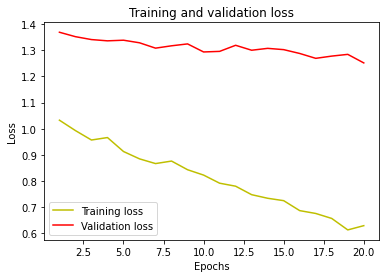

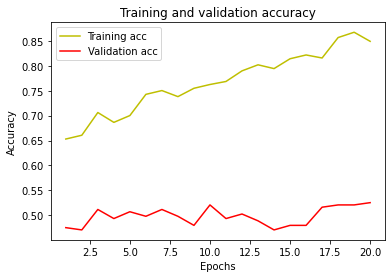

In [17]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# print(np.unique(test_labels, return_counts = True))
# print(np.unique(prediction_NN, return_counts = True))

(array(['full', 'natural', 'small', 'thin', 'thin lower', 'thin upper'],
      dtype='<U10'), array([34, 36, 53, 36, 22, 38], dtype=int64))


NameError: name 'prediction_NN' is not defined

[[27  3  2  0  0  2]
 [ 4  9  8  4  5  6]
 [ 2  2 34 10  1  4]
 [ 0  3 10 21  0  2]
 [ 1  1  4  3 13  0]
 [ 4  5 12  4  2 11]]
219


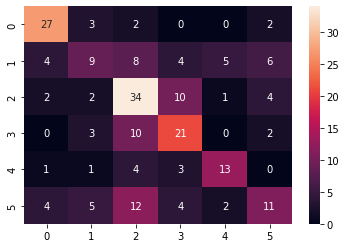

In [19]:
prediction_NN = model1.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)
print(len(test_labels))

In [24]:
print(np.unique(test_labels, return_counts = True))

(array(['full', 'natural', 'small', 'thin', 'thin lower', 'thin upper'],
      dtype='<U10'), array([34, 36, 53, 36, 22, 38], dtype=int64))


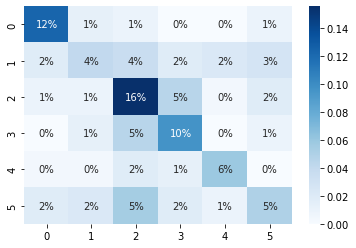

In [20]:

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.0%', cmap='Blues')

In [21]:
#Now, let us use features from convolutional network for RF
model_feats = Model(inputs=model1.inputs, outputs=model1.layers[-2].output)


feature_extractor=model_feats.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to RF


#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = model_feats.predict(x_test)

X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [22]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.5662100456621004


The prediction for this image is:  ['thin lower']
The actual label for this image is:  natural


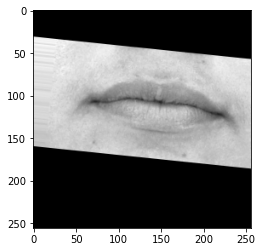

In [44]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=model_feats.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RFr = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RFr)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
it = 